## Example 1

Predict the desired output values based on the Digit Dataset available in SciKit Library.

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

digits=load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

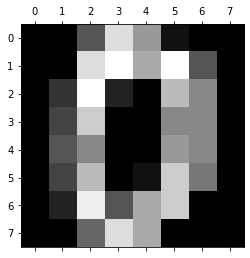

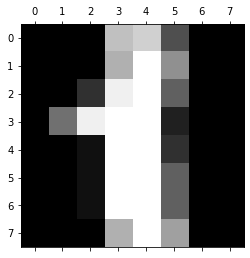

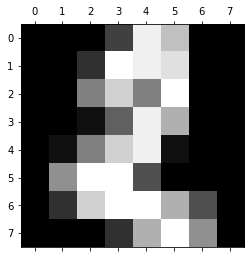

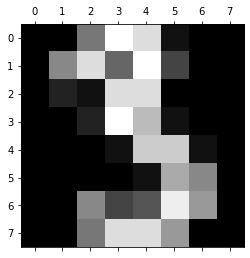

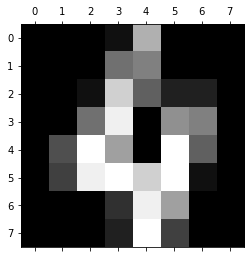

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])

In [4]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
x=df.drop('target',axis=1)
y=digits.target

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
len(x_train)

1437

In [8]:
len(x_test)

360

In [9]:
from sklearn.ensemble import RandomForestClassifier #ensemble is used when we use multiple algorithms. 
model=RandomForestClassifier()
model.fit(x_train,y_train)

#The n_estimators=10 here indicates that there are 10 trees in our model. As we increase it, our accuracy also increases

C:\Users\CHIT CHAT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
model.score(x_test,y_test) #95% accurate model

0.9555555555555556

Text(69.0, 0.5, 'Truth')

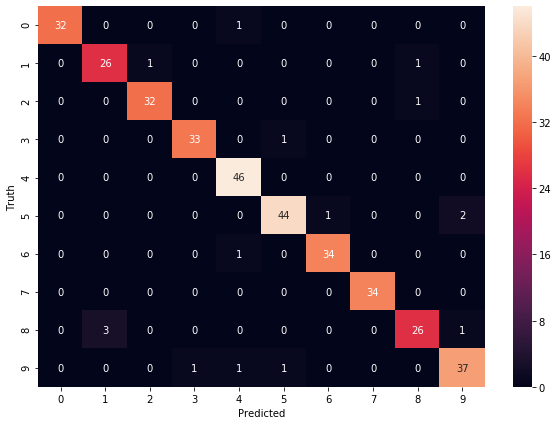

In [11]:
#TO build confusion matrix,

y_predicted=model.predict(x_test)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predicted)

#For visualization,

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Example 2


Classify an iris species as either ( virginica, setosa, or versicolor) based on the petal length, petal height, sepal length, and sepal height.

In [12]:
from sklearn.datasets import load_iris

iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [13]:
import pandas as pd

df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df['target']=iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
x=df.drop('target',axis=1)
y=df['target']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\CHIT CHAT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
model.score(x_test,y_test) #100% accurate

1.0

In [18]:
model.predict(x_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Text(69.0, 0.5, 'Truth')

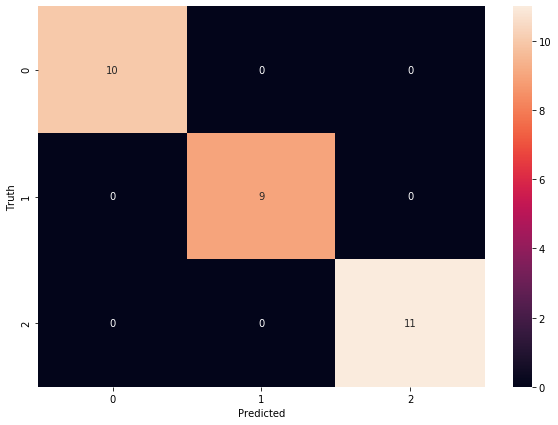

In [19]:
#TO build confusion matrix,

y_predicted=model.predict(x_test)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predicted)

#For visualization,

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Example 3


Predicting the Wine Quality based on the amount of ingredients added.

In [20]:
df=pd.read_csv("assignment/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
x=df.drop('quality',axis=1)
y=df['quality']

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [23]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
model.score(x_test,y_test) #only 65% accurate

0.675

In [25]:
model.predict(x_test)

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 7, 5, 6, 7, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 7, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 7, 6,
       7, 6, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 6, 5,
       7, 5, 7, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 7, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 7, 5, 5, 7, 5, 6, 6, 5, 5, 6,
       5, 7, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 8, 5, 5, 6, 7, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       6, 7, 6, 7, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 4, 6, 6, 6, 5, 5, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 7, 5, 5, 5, 5, 7,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6, 6, 5,

Text(69.0, 0.5, 'Truth')

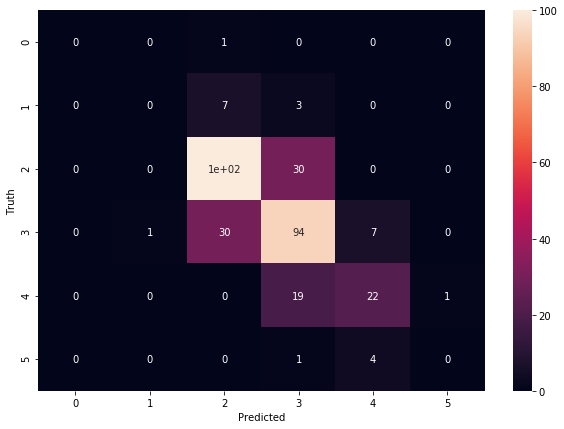

In [26]:
#for confusion matrix,

y_predicted=model.predict(x_test)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predicted)

#For visualization,

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Example 4

In [31]:
import numpy as np
data = pd.read_csv('assignment/fare_dataset.csv') 
print(data) 

                   Bus_type  Level  fare
0            CITY/ ORDINARY      9     8
1                 CITY FAST      8     8
2                   FP/LSFP      7    11
3                        SF      6    15
4  SUPER DELUX/SEMI SLEEPER      5    22
5                    LUXURY      4    30
6                    GARUDA      3    44
7          MULTI AXLE VOLVO      2    45
8                    SCANIA      1    80


In [32]:
x = data.iloc[:, 1:2].values 
print(x) 
y = data.iloc[:,2].values 

[[9]
 [8]
 [7]
 [6]
 [5]
 [4]
 [3]
 [2]
 [1]]


In [33]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

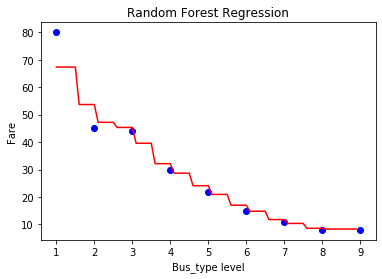

In [34]:
# Visualising the Random Forest Regression results 

# arange for creating a range of values 
# from min value of x to max 
# value of x with a difference of 0.1 
# between two consecutive values 
X_grid = np.arange(min(x), max(x),0.1) 
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value
X_grid = X_grid.reshape((len(X_grid), 1)) 
# Scatter plot for original data 
plt.scatter(x, y, color = 'blue') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'red') 
plt.title('Random Forest Regression') 
plt.xlabel('Bus_type level') 
plt.ylabel('Fare') 
plt.show()